<a href="https://colab.research.google.com/github/mekaviraj/ML_sem5/blob/main/titanic_feature_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Filter Methods:

# i) Basic Methods
# Constant Features
# Quasi-constant features
# Duplicate features


# ii) Statistical Methods
# Correlation
# Mutual Information  (Regression and Classification)
# Chi-Square | Fischer Square
# Univariate feature selection (Or) ANOVA (Regression and Classification)
# Univariate roc-auc | mse  (Regression and Classification)



# 2. Wrapper Methods
# Forward Selection - Add one feature at a time recursively
# Backward Selection - Removes one feature at a time recursively
# Exhaustive Search - searches across all possible feature combinations
# Recursive Feature Elimination (RFE) - i) Ranking Features ii) Iterative Removal  iii) Stopping Criterion

In [20]:
import pandas as pd
titanic_train_df = pd.read_csv("/content/titanic_train.csv")

In [5]:
titanic_test_df = pd.read_csv("/content/titanic_test.csv")

In [6]:

titanic_df = pd.concat([titanic_train_df, titanic_test_df])

In [7]:
#
titanic_test_df.shape

(418, 11)

In [8]:
#
titanic_train_df.shape

(891, 12)

In [9]:
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
titanic_train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [23]:
#
titanic_train_df['Age'] = titanic_train_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [24]:
titanic_train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [25]:
titanic_train_df.drop('Cabin', axis=1, inplace=True)
ttd = titanic_train_df
#
ttd = ttd.drop(['PassengerId', 'Name', 'Ticket'], axis=1)


In [27]:

ttd['Sex'] = ttd['Sex'].map({'male': 0, 'female': 1})

ttd['Embarked'].fillna(ttd['Embarked'].mode()[0], inplace=True)
print(set(ttd['Embarked']))

ttd['Embarked'] = ttd['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

{'S', 'Q', 'C'}


/tmp/ipython-input-3375323081.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ttd['Embarked'].fillna(ttd['Embarked'].mode()[0], inplace=True)


In [28]:
ttd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       0 non-null      float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [29]:
X = ttd.drop('Survived', axis=1)
y = ttd['Survived']

In [30]:
#
constant_features = [feature for feature in X.columns if X[feature].std() == 0]

In [31]:

print(len(constant_features))

0


In [32]:
quasi_const_feat = []

for feature in X.columns:
  predominant = (X[feature].value_counts() / X.shape[0]).sort_values(ascending=False).values[0]
  if predominant >= 0.999:
    quasi_const_feat.append(feature)
print(len(quasi_const_feat))



duplicated_features = []
for i in range(0, len(X.columns)):
  col_1 = X.columns[i]
  for col_2 in X.columns[i+1:]:
    if X[col_1].equals(X[col_2]):
      duplicated_features.append(col_2)

print(len(duplicated_features))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [33]:
#
import matplotlib.pyplot as plt
import seaborn as sns

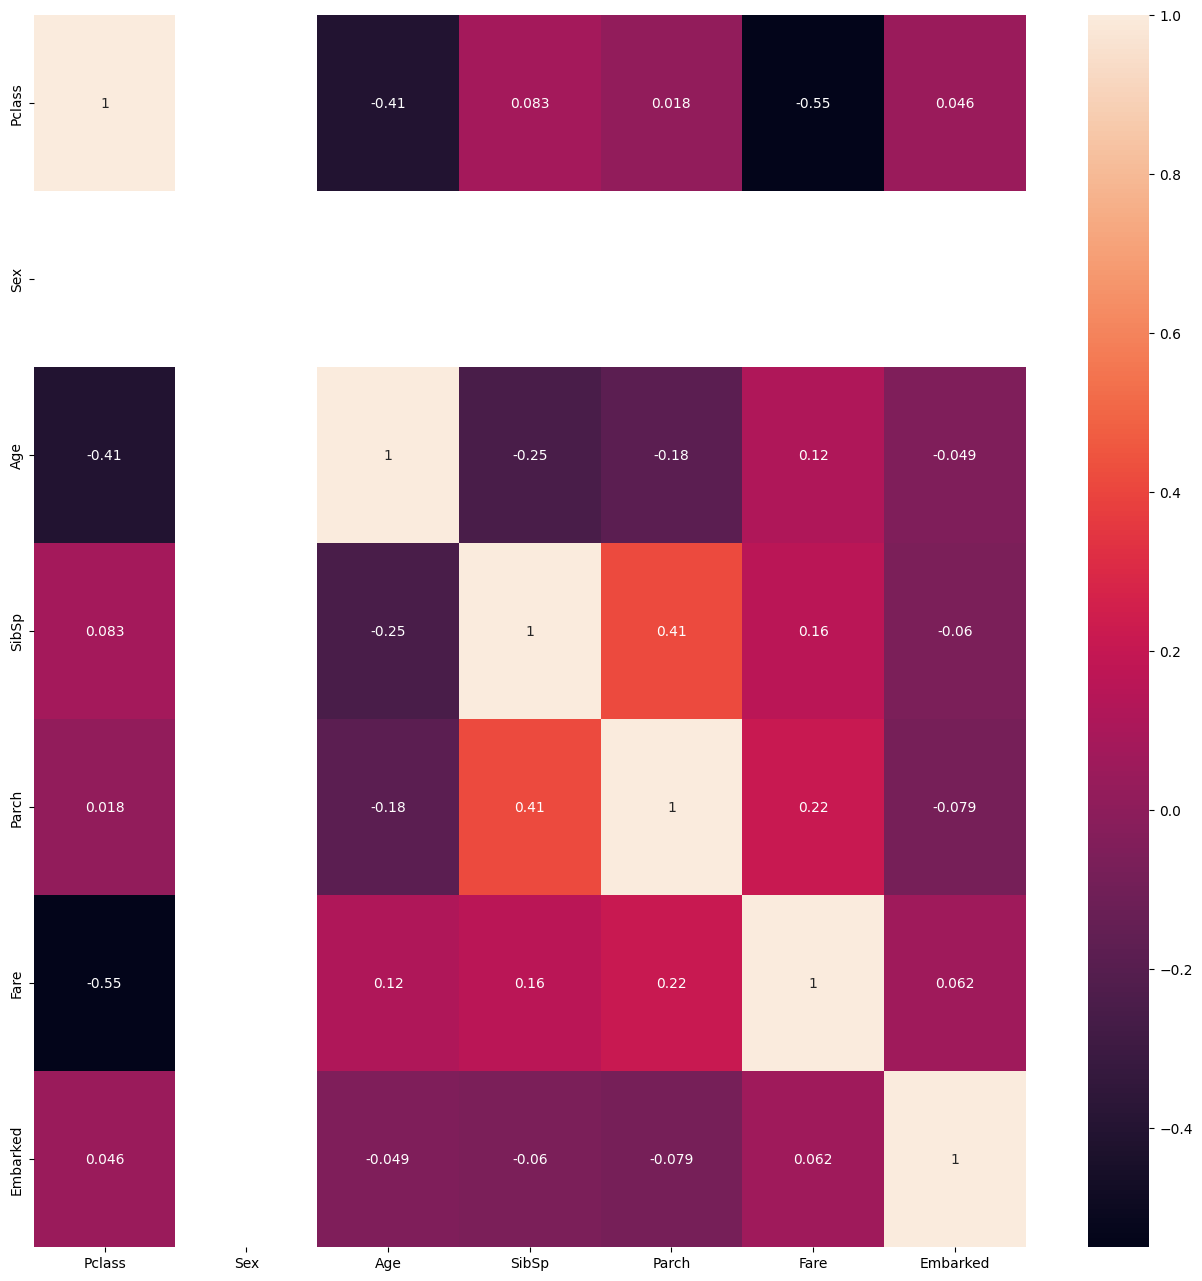

In [34]:
#
corrmat = X.corr()
fig,ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corrmat, annot=True, ax=ax)
plt.show()

In [35]:
#
grouped_features_ls = []
correlated_groups =[]
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [36]:
#
corr_features = correlation(X, 0.9)
print(len(corr_features))

0


In [37]:
#
from sklearn.feature_selection import mutual_info_classif

In [38]:
mi = mutual_info_classif(X.fillna(0), y)
mi = pd.Series(mi)

<Axes: >

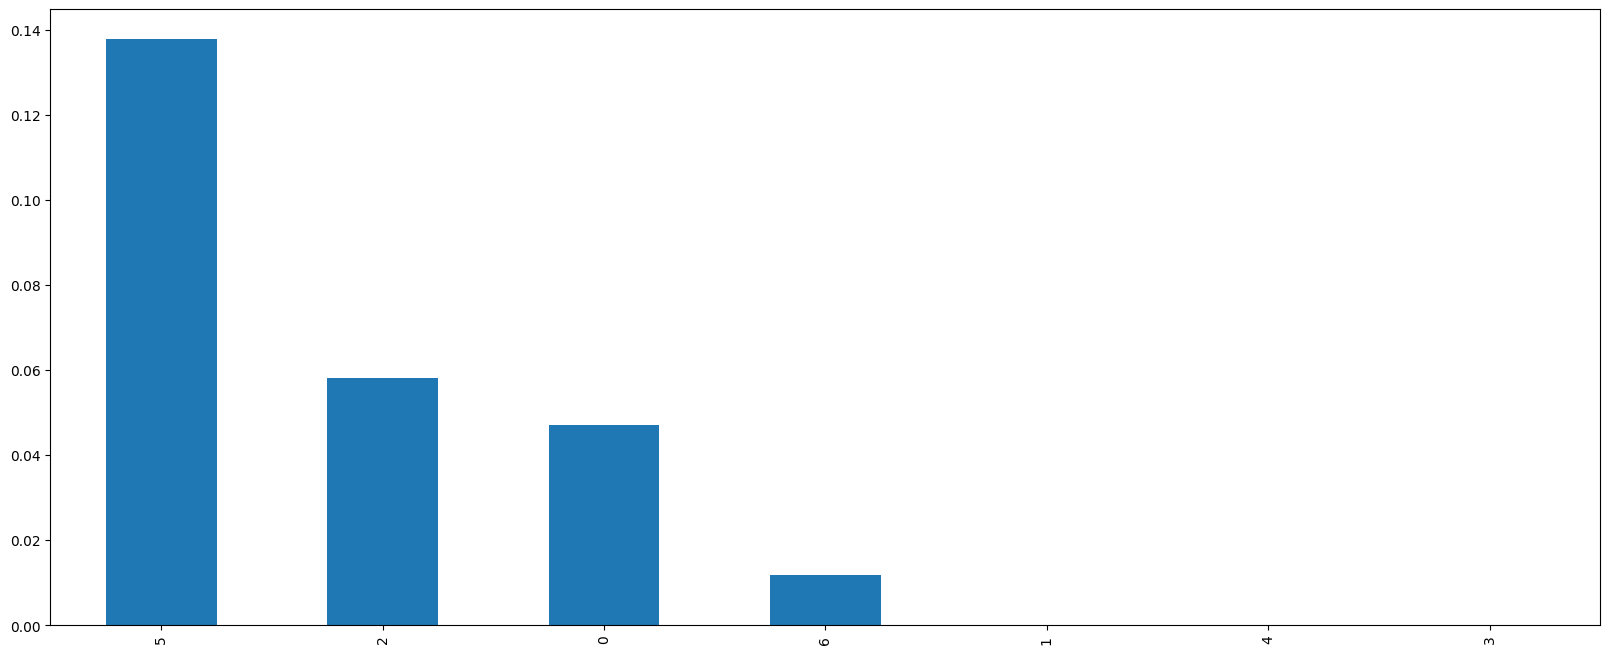

In [39]:
#
mi.sort_values(ascending=False).plot.bar(figsize = (20,8))

In [40]:
#
from sklearn.feature_selection import SelectKBest

In [41]:
#
sel = SelectKBest(mutual_info_classif, k=5)
sel.fit(X.fillna(0), y)
X.columns[sel.get_support()]

Index(['Pclass', 'Age', 'SibSp', 'Fare', 'Embarked'], dtype='object')

In [42]:
#
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

In [43]:
#
X_train,X_test, y_train,y_test = train_test_split(ttd[['Pclass', 'Sex', 'Embarked']], ttd['Survived'], test_size=0.3, random_state=8)

In [44]:
#
f_score = chi2(X_train.fillna(0), y_train)
f_score

(array([23.3402987 ,         nan,  6.17851479]),
 array([1.35726332e-06,            nan, 1.29310775e-02]))

In [45]:
#
pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=True)

,0
Pclass,0.000001
Embarked,0.012931
Sex,NaN


In [46]:
#
from sklearn.feature_selection import SelectKBest, f_classif

selector_anova = SelectKBest(f_classif, k=5)
selector_anova.fit(X.fillna(0), y)

selected_features_anova = X.columns[selector_anova.get_support()]

print("Selected features based on ANOVA:")
print(selected_features_anova)

Selected features based on ANOVA:
Index(['Pclass', 'Age', 'Parch', 'Fare', 'Embarked'], dtype='object')


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


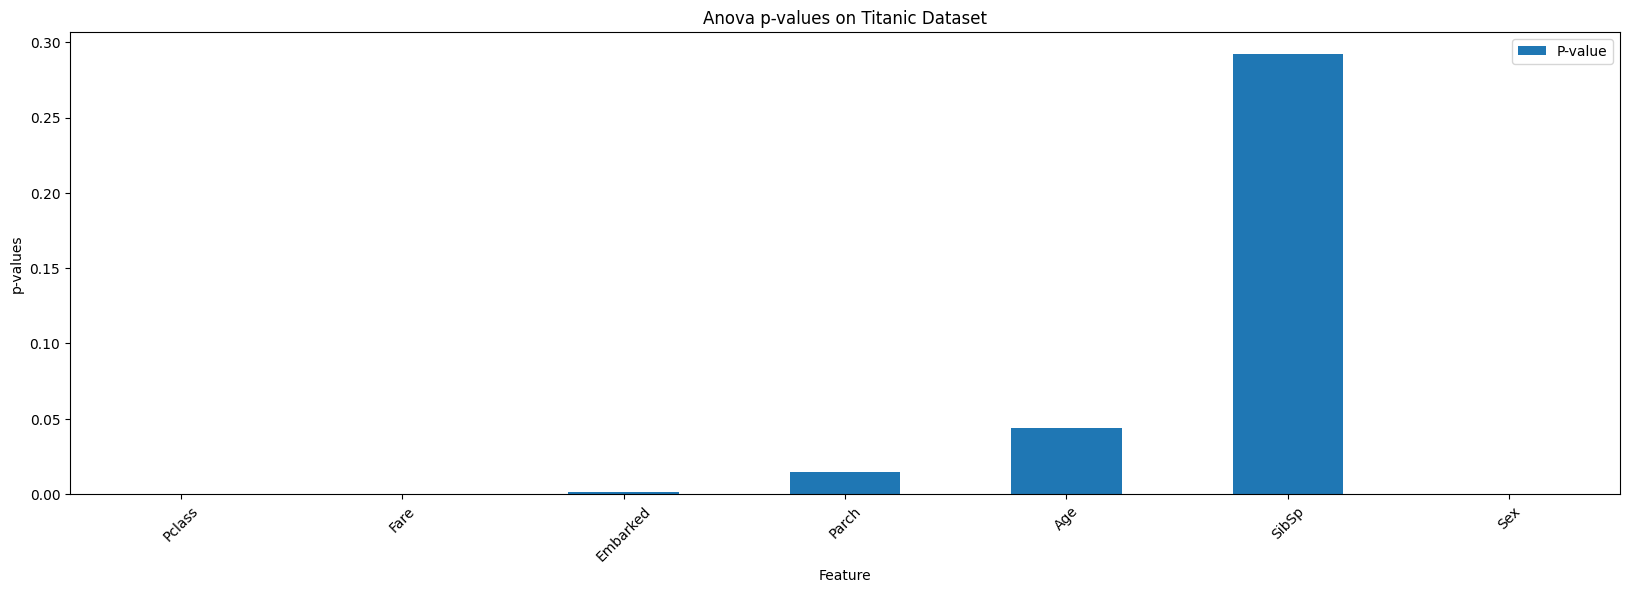

In [47]:
#
from sklearn.feature_selection import f_classif
import pandas as pd
import matplotlib.pyplot as plt

f_scores, p_values = f_classif(X.fillna(0), y)

anova_results = pd.DataFrame({'Feature': X.columns, 'F-score': f_scores, 'P-value': p_values})

anova_results.sort_values(by='P-value', ascending=True).plot.bar(x='Feature', y='P-value', figsize=(20, 6), rot=45)
plt.ylabel("p-values")
plt.title("Anova p-values on Titanic Dataset")
plt.show()

In [48]:
#
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

roc_auc_scores = []
for feature in X.columns:
    feature_values = X[feature].fillna(0)
    if np.isinf(feature_values).any():
        scaler = MinMaxScaler()
        feature_values = scaler.fit_transform(feature_values.values.reshape(-1, 1))
        feature_values = feature_values.flatten()

    try:
        score = roc_auc_score(y, feature_values)
        roc_auc_scores.append(score)
    except ValueError:
        roc_auc_scores.append(0.5)

univariate_roc_auc = pd.Series(roc_auc_scores, index=X.columns)

print("Univariate ROC-AUC scores:")
print(univariate_roc_auc.sort_values(ascending=False))

Univariate ROC-AUC scores:
Fare        0.692122
Embarked    0.563065
Parch       0.561217
SibSp       0.543162
Sex         0.500000
Age         0.473737
Pclass      0.318583
dtype: float64


In [49]:
#
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

sfs_forward = SFS(lr,
                  k_features='best',
                  forward=True,
                  floating=False,
                  verbose=2,
                  scoring='accuracy',
                  cv=5)

sfs_forward = sfs_forward.fit(X, y)

selected_features_forward = list(sfs_forward.k_feature_names_)

print("Features selected by Forward Selection:")
print(selected_features_forward)

AttributeError: 'Parallel' object has no attribute '_pre_dispatch_amount'

In [50]:
#
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

sfs_backward = SFS(lr,
                   k_features='best',
                   forward=False,
                   floating=False,
                   verbose=2,
                   scoring='accuracy',
                   cv=5)

sfs_backward = sfs_backward.fit(X, y)

selected_features_backward = list(sfs_backward.k_feature_names_)

print("Features selected by Backward Selection:")
print(selected_features_backward)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1222, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [51]:
#
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

efs = EFS(lr,
          min_features=1,
          max_features=X.shape[1],
          scoring='accuracy',
          cv=5,
          n_jobs=-1)

efs = efs.fit(X, y)

selected_features_exhaustive = list(efs.best_feature_names_)

print("Features selected by Exhaustive Search:")
print(selected_features_exhaustive)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1222, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [52]:
#
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.fillna(0))

lasso = LassoCV(cv=5).fit(X_scaled, y)

lasso_coef = pd.Series(lasso.coef_, index=X.columns)

print("Lasso coefficients (feature importance):")
print(lasso_coef.sort_values(ascending=False))

ridge = RidgeCV(cv=5).fit(X_scaled, y)

ridge_coef = pd.Series(ridge.coef_, index=X.columns)

print("\nRidge coefficients (feature importance):")
print(ridge_coef.sort_values(ascending=False))

Lasso coefficients (feature importance):
Embarked    0.053179
Parch       0.039466
Fare        0.025880
Sex         0.000000
SibSp      -0.046913
Age        -0.117279
Pclass     -0.196665
dtype: float64

Ridge coefficients (feature importance):
Embarked    0.053089
Parch       0.039719
Fare        0.027907
Sex         0.000000
SibSp      -0.047400
Age        -0.115687
Pclass     -0.193411
dtype: float64
